<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/LinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra

In [1]:
import numpy as np
import numpy.linalg as npl
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [21]:
InteractiveShell.ast_node_interactivity = "all"

## 1) System of Linear Equations

Solve $n$ linear equations in $n$ unknowns;

$\text{Equation 1⇒ }  2 \cdot x - y = 0$   
$\text{Equation 2⇒ }  -x + 2 \cdot y = 3$  

High level matrix view -
$\begin{aligned}
    \begin{bmatrix}
        2 & -1 \\
        -1 & 2
    \end{bmatrix}
    \begin{bmatrix}
        x \\
        y
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        3
    \end{bmatrix}
\end{aligned}$

### 1.1) Row Picture-

In [20]:
scale = list(range(-3,4))
y1 = lambda x: 2 * x   # Equation 1
y2 = lambda x: int((3 + x) / 2)  # Equation 2

for i in scale:
  print(f" For x = {i} -> Eq 1 = {y1(i)}, Eq 2 = {y2(i)}")

 For x = -3 -> Eq 1 = -6, Eq 2 = 0
 For x = -2 -> Eq 1 = -4, Eq 2 = 0
 For x = -1 -> Eq 1 = -2, Eq 2 = 1
 For x = 0 -> Eq 1 = 0, Eq 2 = 1
 For x = 1 -> Eq 1 = 2, Eq 2 = 2
 For x = 2 -> Eq 1 = 4, Eq 2 = 2
 For x = 3 -> Eq 1 = 6, Eq 2 = 3


``
 For x = 1 -> Eq 1 = 2, Eq 2 = 2
``  
The intersection represents the solution to the system of equations.  
Solution: $x = 1$, $y = 2$.

Cross check -   
$\text{Equation 1⇒ }  2 \cdot (1) - (2) = 0$   
$\text{Equation 2⇒ }  -(1) + 2 \cdot (2) = 3$  

### 1.2) Column Picture

Coefficient expressed as vectors.

Column view -
$\begin{aligned}
    x \begin{bmatrix}
        2 \\
        -1
    \end{bmatrix}
    + y \begin{bmatrix}
        -1 \\
        2
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        3
    \end{bmatrix}
\end{aligned}$

In [22]:
vectorA = np.array([2, -1])
vectorB = np.array([-1, 2])

We have solution from row picture $x = 1$ and $y = 2$

In [24]:
scalerA = 1
scalerB = 2

In [25]:
scaleA = scalerA * vectorA  # Scaling vector A by 1
scaleB = scalerB * vectorB  # Scaling vector B by 2
scaleA + scaleB  # Linear combination of A & B

array([0, 3])

Given two vectors $c$ and $d$ and scalars $x$ and $y$, the sum $xc + yd$ is called a linear combination of $c$ and $d$.

$\begin{aligned}
  \text{Geometrically, we want } (x) \text{ and }  (y) \text{ such that }
  (x) \text{ copies of}
  \begin{bmatrix}
    2 \\
    -1
  \end{bmatrix}
  \text{ added to } (y) \text{ copies of }
    \begin{bmatrix}
    -1 \\
    2
  \end{bmatrix}
  \text{ equals the vector}
  \begin{bmatrix}
  0 \\
  3
  \end{bmatrix}
\end{aligned}$

### 1.3) Matrix Picture

#### Notation

Coefficients expressed as matrix and unknowns as vectors.

Matrix view -
$\begin{aligned}
    \begin{bmatrix}
        2 & -1 \\
        -1 & 2
    \end{bmatrix}
    \begin{bmatrix}
        x \\
        y
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        3
    \end{bmatrix}
    \\
    A & x  = b
\end{aligned}$  

$A \in \mathbb{R}^{m*n} \text{ a matrix with } m \text{ rows and } n \text{ columns}$

$x \in \mathbb{R}^{n} \text{ a vector with } n \text{ entries}$

By convention, an n-dimensional vector is often thought of as a matrix with $(n) rows$ and $(1) column$, known as a **column vector**.

In [115]:
matA = np.array([[2,-1], [-1,2]])
matA

array([[ 2, -1],
       [-1,  2]])

In [116]:
vec_b = np.array([0, 3])
vec_b

array([0, 3])

Properties of numpy array

In [139]:
print(f"Number of dimensions = {matA.ndim}")
print(f"(rows, columns) = {matA.shape}")
print(f"Total number of elements  = {matA.size}")
print(f"Data type of the elements = {matA.dtype}")
print(f"Size in bytes of each element = {matA.itemsize}")

Number of dimensions = 2
(rows, columns) = (2, 2)
Total number of elements  = 4
Data type of the elements = int64
Size in bytes of each element = 8


#### Indexing

$i^{th}$ element of $x$ is $x_i$, similarly, elements of $A$ are accessed by $a_{ij}$

$Row = i$,  $Column = j$

In [117]:
matA[1,0]  # indexing starts from 0

-1

In [118]:
vec_b[0]

0

#### Solving $Ax = b$

In [119]:
vectorX = np.linalg.solve(matA, vec_b)
vectorX

array([1., 2.])

In general, for a real-valued system of linear equations we obtain **either no, exactly one, or infinitely many solutions**.

## 2) Matrix Operations

### 2.1) Matrix Transpose

$\begin{aligned}
    x =
    \begin{bmatrix}
        1 & 2 \\
        3 & 4
    \end{bmatrix}
    x^T =
    \begin{bmatrix}
        1 & 3 \\
        2 & 4
    \end{bmatrix}
\end{aligned}$



In [145]:
vecX = np.array([[1,2], [3,4]])

In [146]:
vecX.T

array([[1, 3],
       [2, 4]])

### 2.2) Matrix Addition

Sum of two matrices is defined element wise.

In [90]:
matA = np.array([[2,5], [1,3]])
matB = np.array([[2,5], [1,3]])

In [91]:
matA + matB

array([[ 4, 10],
       [ 2,  6]])

**Addition Properties**:  
$\text{Commutative} ⇒ A+B = B+A$  
$\text{Distributive} ⇒ c(A + B) = cA + cB$  
$\text{Associative} ⇒ (A+B)+C = A+(B+C)$  

### 2.3) Matrix multiplication

The product of two matrices $A \in \mathbb{R}^{m \times b}$ and $B \in \mathbb{R}^{n \times p}$ is the matrix $C = AB \in \mathbb{R}^{m \times p}$ where $\boxed{C_{ij} = \sum\limits_{k=1}^n A_{ik} B_{kj}}$

Multiplication $(m \times p)$ to exist $(m \times n) (n \times p)$ inner dimension must match.

The number of columns in $A$ must equal the number of rows in $B$.

#### 1) Scalar Multiplication

In [123]:
vecX =  np.array([1,2])

In [122]:
vecX*2

array([2, 4])

#### 2) Vector-Vector Product

_Also called inner product or dot product of vectors._

$x^T \cdot y = \sum\limits_{k=1}^n x_{i} y_{i}$

$x^T \cdot y = y^T \cdot x$

In [148]:
vecX = np.array([1,2])
vecY = np.array([2,1])
vecX.shape, vecY.shape

((2,), (2,))

In [149]:
result = 0
for i in range(0, len(vecX)):
  result += vecX[i]*vecY[i]
result

4

In [150]:
np.dot(vecX,vecY)  # numpy . operator

4

#### 3) Matrix-Vector Product

_Linear combination of columns of matrix_

$y = Ax$, where $y$ is a linear combination of the columns of $A$.

$y^T = x^TA$, where $y$ is a linear combination of the rows of $A$.

In [151]:
matA = np.array([[2,5], [1,3]])
vecX =  np.array([1,2])

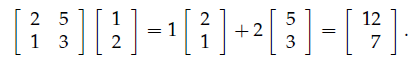

In [152]:
def linear(mat, vec):
  result = np.zeros(mat.shape[1])
  for col in range(mat.shape[1]):
    col_vector = mat[:, col]
    scaled_vector = vec[col] * col_vector
    result += scaled_vector
  return result

In [153]:
linear(matA, vecX)

array([12.,  7.])

In [154]:
np.matmul(matA, vecX)

array([12,  7])

In [157]:
np.matmul(vecX.T, matA)

array([ 4, 11])

#### 4) Matrix-Matrix Product

_Dot product._

In [188]:
A = np.array([[1,2], [3,4]])
B = np.array([[4,3], [2,1]])

In [189]:
A.dot(B)  # np.dot

array([[ 8,  5],
       [20, 13]])

In [190]:
A @ B  # @ operator

array([[ 8,  5],
       [20, 13]])

In [191]:
np.matmul(A, B)  # np.matmul

array([[ 8,  5],
       [20, 13]])

**Multiplication Properties**:  
$\text{Not Commutative} ⇒ AB \ne BA$  
$\text{Associative} ⇒ (AB)C = A(BC)$  
$\text{Distributive} ⇒ A(B + C ) = AB + BC$  

In [182]:
A = np.array([[0,0], [1,0]])
B = np.array([[0,0], [0,1]])

In [185]:
A @ B == B @ A

array([[ True,  True],
       [False,  True]])